# SimpleRNN

### Sequential API

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

shape1=x_train.shape[1]
shape2=x_train.shape[2]

#shape1:timestep=28,shape2:특성변수
x_train=x_train.reshape(-1, shape1,shape2).astype('float32') #RNN의 입력은 표본을 포함하여 3D 텐서임
x_test=x_test.reshape(-1, shape1,shape2).astype('float32')
x_train=x_train/255.
x_test=x_test/255.

input_shape=(shape1,shape2) #RNN의 표본 하나당 입력은 2D 텐서임

#SimpleRNN 모델
model=Sequential()
model.add(SimpleRNN(units=256,dropout=0.2, input_shape=input_shape))
model.add(Dense(10,activation='softmax'))
model.summary()
plot_model(model,to_file='C:/Users/ysp/Desktop/딥러닝 프로그램/ch2_3.png', show_shapes=True)
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)
score=model.evaluate(x_test,y_test)
print(score)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
60000/60000 [==============================] - 12s 205us/step - loss: 0.4510 - accuracy: 0.8607
Epoch 2/30
60000/60000 [==============================] - 12s 198us/step - loss: 0.2587 - accuracy: 0.9235
Epoch 3/30
60000/60000 [==============================] - 12s 196us/step - loss: 0.2209 - accuracy: 0.9348
Epoch 4/30
60000/60000 [==============================] - 12s 200us/step - loss: 0.1986 - accuracy: 0.9402
Epoch 5/30
60000/60000 [==============================] - 12s 206us/step - loss: 0.1

* simpeRNN 에서의 Dropout 
특성변수 xt 에 대해. x변수에 대해. xt의 특성변수의 노드의 수에서 20%를 드랍함.
* recurrent dropout
-> 
* Simple RNN : (28개의 linear combination + 256개의 linear combination + bias 256개) *256 = 72960
=> 75000 개의 param 개수. CNN 에서보다 줄어들음.
* LSTM 은 4배
* GRU 는 3배

### functional API
input A -> dense1 -> dense2 ->
* 두 개 이상의 input, output이 있으면 functional API 를 쓸수밖에 없다.
* concatenate 같은 경우에는 default로 맨 마지막 축 특성변수로. 특성변수를 늘려준다. / default -1으로
* 맨 마지막 축은 사실상/대부분 특성변수의 역할을 한다.
* Boston Housing data: 13개의 특성변수의 1개의 

In [ ]:
# p.92 boston housing data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing


(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

print(x_train.dtype,y_train.dtype)
print(x_train.shape,y_train.shape)
print(x_test.shape)

float64 float64
(404, 13) (404,)
(102, 13)


In [1]:
# input A, input B 두개이므로 데이터를 쪼갬

In [2]:
x_train1, x_train2=x_train[:,:10],x_train[:,3:]
x_test1,x_test2=x_test[:,:10],x_test[:,3:]
print(x_train1.shape,x_train2.shape)

(404, 10) (404, 10)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           176         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           272         dense[0][0]                      
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
______________________________________________________________________________________________

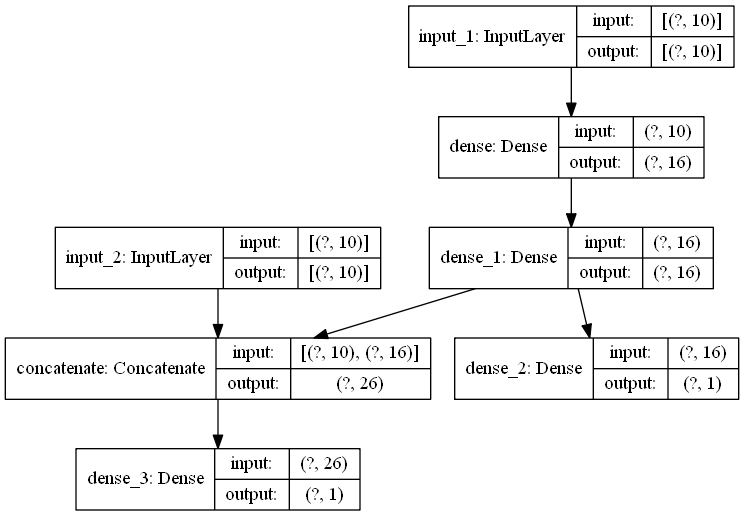

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense, concatenate
from tensorflow.keras.utils import plot_model

input_A=Input(shape=[10]) #input1
input_B=Input(shape=[10]) #input2
h1=Dense(16,activation='relu')(input_A) #그림 4-1에서 dense1에 해당
h2=Dense(16,activation='relu')(h1) #dense2에 해당
concat=concatenate([input_B,h2]) #inputB와 h2를 연결. concatenate.
out1=Dense(1)(h2) #output 하나를 꺼내고
out2=Dense(1)(concat) #concat 해서 output2를 만듦
model=Model(inputs=[input_A,input_B],outputs=[out1,out2]) #input과 output을 선언해줌 -> 모델 생성.
model.summary()
plot_model(model,show_shapes=True)

=> concatenate 에서 사이즈가 26 : 10 + 16

layer가 어떻게 형성되어 있는지 확인. model.layers

In [4]:
model.layers

get_weights 로 weight를 찍어봄.
shape도 찍어봄.

In [5]:
hidden1=model.layers[1]
weights,biases=hidden1.get_weights()
print(weights.shape,weights)
print(biases.shape,biases)

(10, 16) [[-0.10724235 -0.18741104 -0.44234705  0.14790177 -0.46027634 -0.17149696
   0.38175774 -0.00334138 -0.38418514 -0.41433114  0.11831856 -0.24922806
   0.02667409 -0.23837002 -0.18275312 -0.10767919]
 [-0.34755817  0.06121993  0.17995185  0.45067543  0.30367386  0.35875112
   0.4366793   0.08975631 -0.15981716  0.31862277 -0.17342982  0.4313659
   0.28060424 -0.21023268  0.02463055 -0.4501135 ]
 [-0.33583942 -0.06272307 -0.2552985  -0.01841912 -0.2402802  -0.02759352
   0.27279097  0.26227653  0.4148528  -0.41311777  0.38369638 -0.07311404
  -0.28672922 -0.05390751 -0.43245807  0.25751954]
 [ 0.2729907  -0.2843875  -0.43425888 -0.32864895  0.4181382  -0.07440725
  -0.10804075  0.17574221  0.1496318  -0.18839201  0.2541082   0.29582024
   0.42360288  0.367689   -0.13823384 -0.17317131]
 [-0.40499395 -0.14063042  0.34658545  0.41513675  0.16247171 -0.37963519
  -0.00273505  0.17027992  0.4439537  -0.3884431   0.4665851   0.3998283
  -0.46063048 -0.36793557  0.01762268  0.47255355

(16,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
=> bias 16개, 초기치는 전부 0임

#### compile
* output이 2개니까 각각 mse,mse
* 각각 loss weight 20%,80%로

#### fit
* input, output 각각 2개씩 선언

(3/30 2시 40분쯤부터 다시듣기)
mse는 절대값이 크니까 weight를 작게 줘야함. (??)

In [6]:
model.compile(loss=['mse','mse'],loss_weights=[0.2,0.8], optimizer='RMSprop')
history=model.fit([x_train1,x_train2],[y_train,y_train],epochs=10, batch_size=32, validation_data=([x_test1,x_test2],[y_test,y_test]))

Train on 404 samples, validate on 102 samples
Epoch 1/10
404/404 [==============================] - 1s 3ms/sample - loss: 2496.5655 - dense_2_loss: 280.8043 - dense_3_loss: 2974.4536 - val_loss: 768.2579 - val_dense_2_loss: 212.2110 - val_dense_3_loss: 881.3286
Epoch 2/10
404/404 [==============================] - 0s 146us/sample - loss: 775.2612 - dense_2_loss: 191.5917 - dense_3_loss: 920.3929 - val_loss: 502.0324 - val_dense_2_loss: 213.6602 - val_dense_3_loss: 532.6976
Epoch 3/10
404/404 [==============================] - 0s 141us/sample - loss: 609.4327 - dense_2_loss: 188.7000 - dense_3_loss: 708.9359 - val_loss: 424.8711 - val_dense_2_loss: 212.0175 - val_dense_3_loss: 441.2438
Epoch 4/10
404/404 [==============================] - 0s 114us/sample - loss: 502.0875 - dense_2_loss: 189.6873 - dense_3_loss: 578.1742 - val_loss: 364.4220 - val_dense_2_loss: 209.4529 - val_dense_3_loss: 375.9322
Epoch 5/10
404/404 [==============================] - 0s 99us/sample - loss: 430.5802 - de

In [7]:
hidden2=model.layers[1]
weights,biases=hidden2.get_weights()
print(weights,biases)

[[-0.04042259 -0.25586587 -0.5182084   0.18659775 -0.44329733 -0.22203964
   0.38175774 -0.00334138 -0.38418514 -0.3300557   0.11831856 -0.24922806
   0.02667409 -0.1424246  -0.14768825 -0.10767919]
 [-0.39397532  0.104612    0.2528646   0.45324126  0.29038197  0.37839597
   0.4366793   0.08975631 -0.15981716  0.23135102 -0.17342982  0.4313659
   0.28060424 -0.3213191   0.04969104 -0.4501135 ]
 [-0.30271485 -0.08886024 -0.29735708  0.00885042 -0.24432737 -0.04970498
   0.27279097  0.26227653  0.4148528  -0.3669234   0.38369638 -0.07311404
  -0.28672922 -0.00597191 -0.41262582  0.25751954]
 [ 0.30080804 -0.30743006 -0.43843773 -0.2882337   0.41088626 -0.11438128
  -0.10804075  0.17574221  0.1496318  -0.18577288  0.2541082   0.29582024
   0.42360288  0.29999676 -0.08651935 -0.17317131]
 [-0.4106778  -0.13202336  0.3556216   0.42308465  0.15898243 -0.37858433
  -0.00273505  0.17027992  0.4439537  -0.40149415  0.4665851   0.3998283
  -0.46063048 -0.4156246   0.02963799  0.47255355]
 [ 0.21

## Subclassing API
* 맞춤형으로 만들 수 있는 API. customization 으로 class를 만듦
* python 용법임. class를 정의.
* subclassing 을 쓰는 이유: sequential 은 1A로 감. functional 은 병렬형. 점프, if문, ... 등 을 위해 subclassing 을 씀.

In [11]:
import tensorflow as tf
#tf.keras 에 내장된 model.Model을 parent로 가져올 것이라는 뜻.
#parent에 있는 모든 키워드와 용법들을 사용할 수 있음.
class TinoutModel(tf.keras.models.Model): 
    #initial: 모형을 만들기 위한 연료, 재료들을 정의.
    # models.Model 에 있는 argument들을 불러옴.
    #**kwargs : dictionary 형태의 데이터를 저장해라. super 라는건 parent 모델의 모든걸 저장해라.
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.h1=Dense(units,activation=activation)
        self.h2=Dense(units,activation=activation)
        self.out1=Dense(1)
        self.out2=Dense(1)
    # call 함수에 의해 묶음. 반드시 'call' 이라고 해야함. 
    # 왜냐하면 parent model 이 이런 형식으로 되어있기 때문에.
    # fit을 할 때 call이 작동하면서 비소로 데이터가 공급되기 시작함. input, output.
    def call(self,inputs):
        input_A,input_B=inputs
        h1=self.h1(input_A)
        h2=self.h2(h1)
        concat=concatenate([input_B,h2])
        out1=self.out1(h2)
        out2=self.out2(concat)
        return out1,out2

# model 이라는걸로 TinoutModel을 객체화함
model=TinoutModel(units=16)

In [12]:
model.compile(loss=['mse','mse'],loss_weights=[0.2,0.8], optimizer='RMSprop')
# fit을 할 때 데이터가 들어감. 그걸 call이 활성화시킴.input이 인식이 될 때.
history=model.fit([x_train1,x_train2],[y_train,y_train],epochs=20, batch_size=32, validation_data=([x_test1,x_test2],[y_test,y_test]))

Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 1s 2ms/sample - loss: 609.5126 - output_1_loss: 1015.6562 - output_2_loss: 500.4515 - val_loss: 388.0870 - val_output_1_loss: 288.0276 - val_output_2_loss: 408.0510
Epoch 2/20
404/404 [==============================] - 0s 106us/sample - loss: 288.7407 - output_1_loss: 201.3183 - output_2_loss: 306.3927 - val_loss: 265.7160 - val_output_1_loss: 174.8161 - val_output_2_loss: 295.5755
Epoch 3/20
404/404 [==============================] - 0s 136us/sample - loss: 203.4773 - output_1_loss: 141.3242 - output_2_loss: 216.5484 - val_loss: 201.6781 - val_output_1_loss: 173.7376 - val_output_2_loss: 221.0680
Epoch 4/20
404/404 [==============================] - 0s 148us/sample - loss: 149.6524 - output_1_loss: 133.2197 - output_2_loss: 153.1761 - val_loss: 159.6609 - val_output_1_loss: 162.0281 - val_output_2_loss: 162.6199
Epoch 5/20
404/404 [==============================] - 0s 121us/sample - los

* subclassing API의 단점: summary로 해도 데이터를 직접 넣기 전에는 알지 못함.
* call 함수에서 인식이 돼야하기 때문에.

In [13]:
model.summary()

Model: "tinout_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  176       
_________________________________________________________________
dense_5 (Dense)              multiple                  272       
_________________________________________________________________
dense_6 (Dense)              multiple                  17        
_________________________________________________________________
dense_7 (Dense)              multiple                  27        
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________


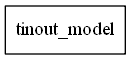

In [14]:
plot_model(model,show_shapes=True)